This notebook presents an in-depth analysis of survey data, focusing on key areas of interest, including:

1. **Overall Sentiment Toward Muslims (October 2024)**: Responses are classified into three distinct categories — Good, Neutral, Bad.

2. **Perceptions Across Demographics**: An exploration of how different religious groups (e.g.Christians, Muslims, Buddhists), educational levels, and geographic regions view Muslims.

3. **The Impact of Personal Connections**: Analyzing how familiarity with Muslims influences respondents' attitudes and feelings toward them.

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
survey_oct24= pd.read_csv("data/muslim_brand_oct_2024.csv")

In [116]:
survey_oct24.head()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,collector_type_source,...,Where do you get your news from?,Unnamed: 16,How comfortable do you feel interacting with Muslims in your community?,How often do you hear positive things about Muslims in the media?,"In the last 30 days, have you come across any events or activities sponsored by a Muslim person or organization?",Gender,Age,Major US Region,Device,Household Income
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Response,Other (please specify),Response,Response,Response,NaN,NaN,NaN,NaN,NaN
1,1.147024e+11,433019017.0,10/01/2024 05:14:33 PM,10/01/2024 05:15:04 PM,NaN,NaN,NaN,NaN,9ab9ed1f5c9ee2c551aa2ac2eb,smc,...,Facebook,NaN,Very comfortable,Often,Yes,male,30_to_44,pacific,ios_mobile,75000_to_99999
2,1.147024e+11,433019017.0,10/01/2024 05:14:37 PM,10/01/2024 05:15:02 PM,NaN,NaN,NaN,NaN,4f49dd8caed987acd6c3527f29,smc,...,CNN,NaN,Very comfortable,Often,Yes,male,18_to_29,west_south_central,android_mobile,0_to_9999
3,1.147024e+11,433019017.0,10/01/2024 05:14:14 PM,10/01/2024 05:14:40 PM,NaN,NaN,NaN,NaN,53a89bba70140be9c1304f5545,smc,...,FOX News,NaN,Very comfortable,Often,NaN,male,18_to_29,middle_atlantic,android_mobile,100000_to_124999
4,1.147024e+11,433019017.0,10/01/2024 05:13:00 PM,10/01/2024 05:13:56 PM,NaN,NaN,NaN,NaN,e4e83f51511896ae170841e0f7,smc,...,Facebook,NaN,Neutral,I don't know,Not sure,male,30_to_44,east_north_central,android_mobile,50000_to_74999


In [117]:
survey_oct24= survey_oct24.iloc[1:]

In [118]:
survey_oct24.columns

Index(['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       'Email Address', 'First Name', 'Last Name', 'Custom Data 1',
       'collector_type_source', 'What is your religion?', 'Unnamed: 11',
       'In the last 7 days, how many muslim people have you talked to?',
       'How do you feel about Muslim people in America?',
       'What is your level of education?', 'Where do you get your news from?',
       'Unnamed: 16',
       'How comfortable do you feel interacting with Muslims in your community?',
       'How often do you hear positive things about Muslims in the media?',
       'In the last 30 days, have you come across any events or activities sponsored by a Muslim person or organization?',
       'Gender', 'Age', 'Major US Region', 'Device', 'Household Income'],
      dtype='object')

In [119]:
survey_oct24.rename(columns={'Unnamed: 11': 'Religion_other'}, inplace=True)
survey_oct24.rename(columns={'Unnamed: 16': 'News_other'}, inplace=True)

In [121]:
survey_oct24.columns

Index(['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       'Email Address', 'First Name', 'Last Name', 'Custom Data 1',
       'collector_type_source', 'What is your religion?', 'Religion_other',
       'In the last 7 days, how many muslim people have you talked to?',
       'How do you feel about Muslim people in America?',
       'What is your level of education?', 'Where do you get your news from?',
       'News_other',
       'How comfortable do you feel interacting with Muslims in your community?',
       'How often do you hear positive things about Muslims in the media?',
       'In the last 30 days, have you come across any events or activities sponsored by a Muslim person or organization?',
       'Gender', 'Age', 'Major US Region', 'Device', 'Household Income'],
      dtype='object')

In [122]:
# remove columns with all null values
survey_oct24= survey_oct24.drop(['Respondent ID','Collector ID','Email Address', 'First Name','Last Name','IP Address'], axis=1)

# 1. Religious Demographics

In [123]:
def plot_counts(df, column_name, x_label, title):
    """
    Creates a bar plot of the counts of religion.
    Highlights the largest count in red and the rest in grey.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to plot.
    """
   
    counts_df = df[column_name].value_counts().reset_index()
    counts_df.columns = ['Category', 'Count']
    max_index = counts_df['Count'].idxmax()

    colors = ['grey' if i != max_index else 'red' for i in range(len(counts_df))]

    plt.figure(figsize=(9, 5))
    sns.barplot(x='Category', y='Count', data=counts_df, palette=colors)


    plt.title(title, fontsize=12)
    plt.xlabel(x_label, fontsize=10)
    plt.ylabel('Count', fontsize=10)

    # Rotate x labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.show()

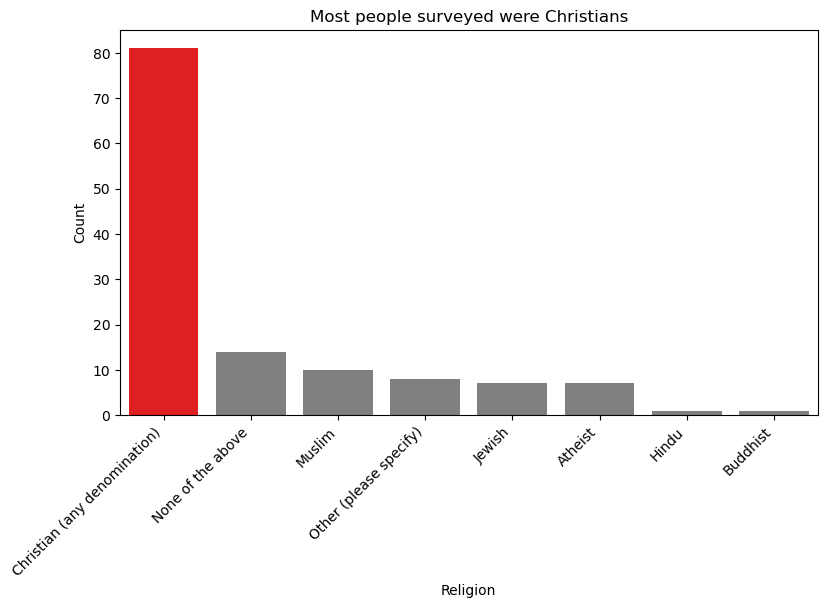

In [124]:
plot_counts(survey_oct24,'What is your religion?', 'Religion', 'Most people surveyed were Christians')

# 2. Distribution of Sentiments Across All Participants

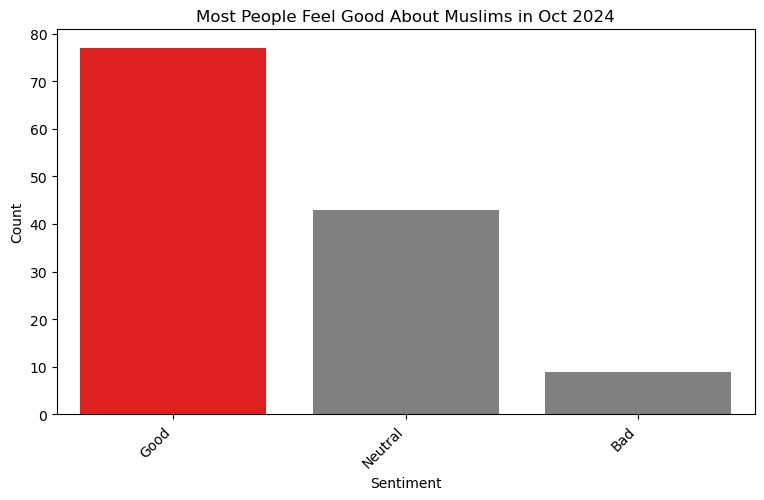

In [88]:
plot_counts(survey_oct24,'How do you feel about Muslim people in America?', 'Sentiment', 'Most People Feel Good About Muslims in Oct 2024')

# 3. Views on Muslims across different religious demographics

In [84]:
def plot_stacked_bar_chart(df, title, xlabel, ylabel, colors, cat_col, sent_col, legend_title='View'):
    """
    Plots a stacked bar chart based on the grouping of two columns, one for categories (e.g., education or religion)
    and the other for sentiments
    """
    grouped = df.groupby([cat_col, sent_col]).size().unstack()

   
    if 'Good' in grouped.columns and 'Bad' in grouped.columns and 'Neutral' in grouped.columns:
        sentiment_religion = grouped[['Good', 'Bad', 'Neutral']].fillna(0)
    else:
        sentiment_religion = grouped.fillna(0)

    sentiment_religion['Total'] = sentiment_religion.sum(axis=1)

    sentiment_religion_sorted = sentiment_religion.sort_values(by='Total', ascending=False)

    sentiment_religion_sorted = sentiment_religion_sorted.drop(columns=['Total'])

    ax = sentiment_religion_sorted.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)

    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

    plt.xticks(rotation=45, ha='right')

    plt.legend(title=legend_title, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

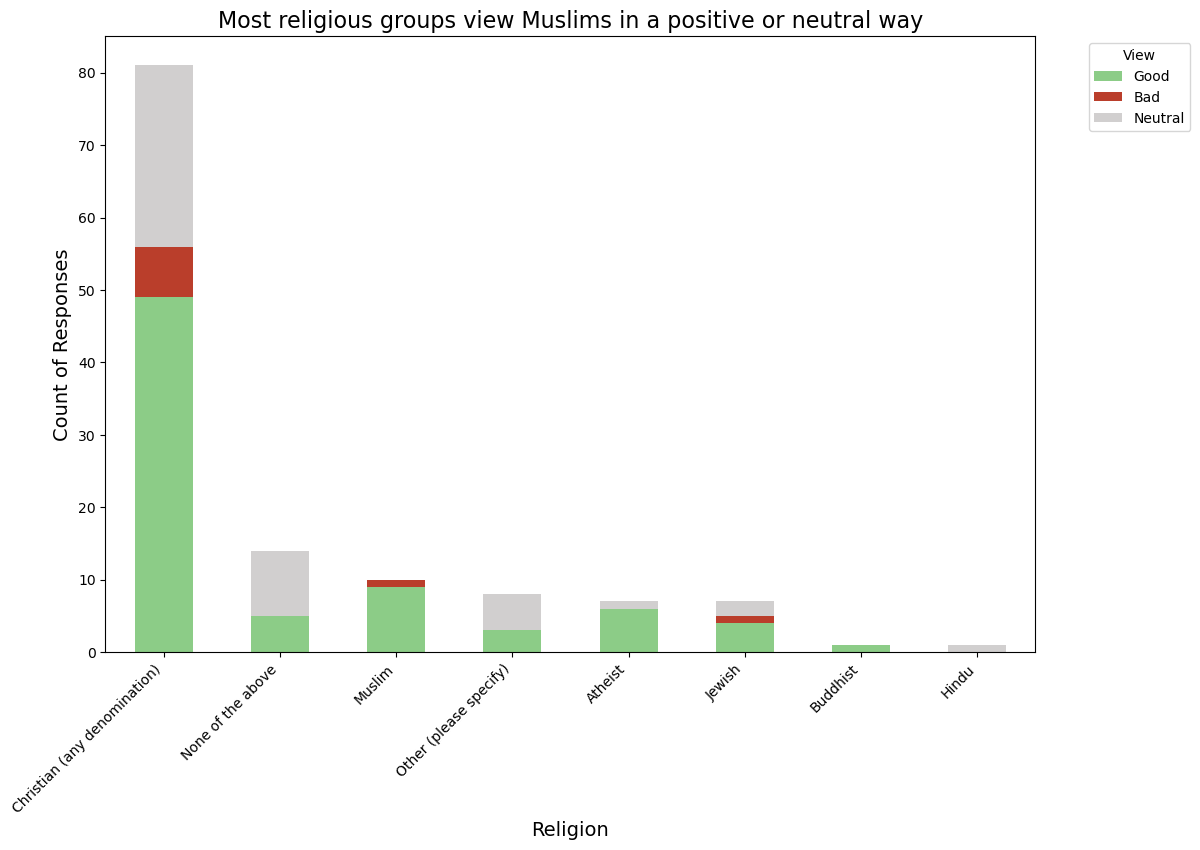

In [85]:
plot_stacked_bar_chart(
    df=survey_oct24,  
    title='Most religious groups view Muslims in a positive or neutral way',
    xlabel='Religion',
    ylabel='Count of Responses',
    colors=['#8ccc87', '#ba3e2b', '#d1cfcf'],
    cat_col='What is your religion?',
    sent_col='How do you feel about Muslim people in America?'
)


# 4. Views on Muslims across different educational demographics

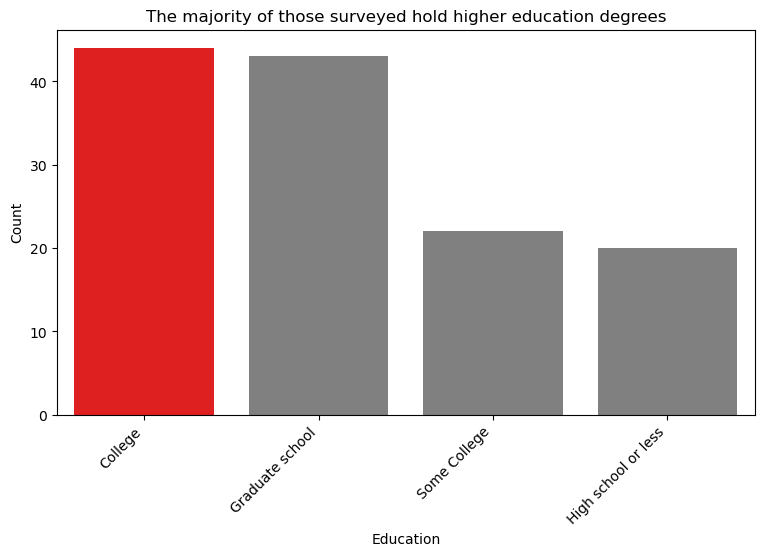

In [89]:
plot_counts(survey_oct24,'What is your level of education?', 'Education',
           'The majority of those surveyed hold degrees higher education')

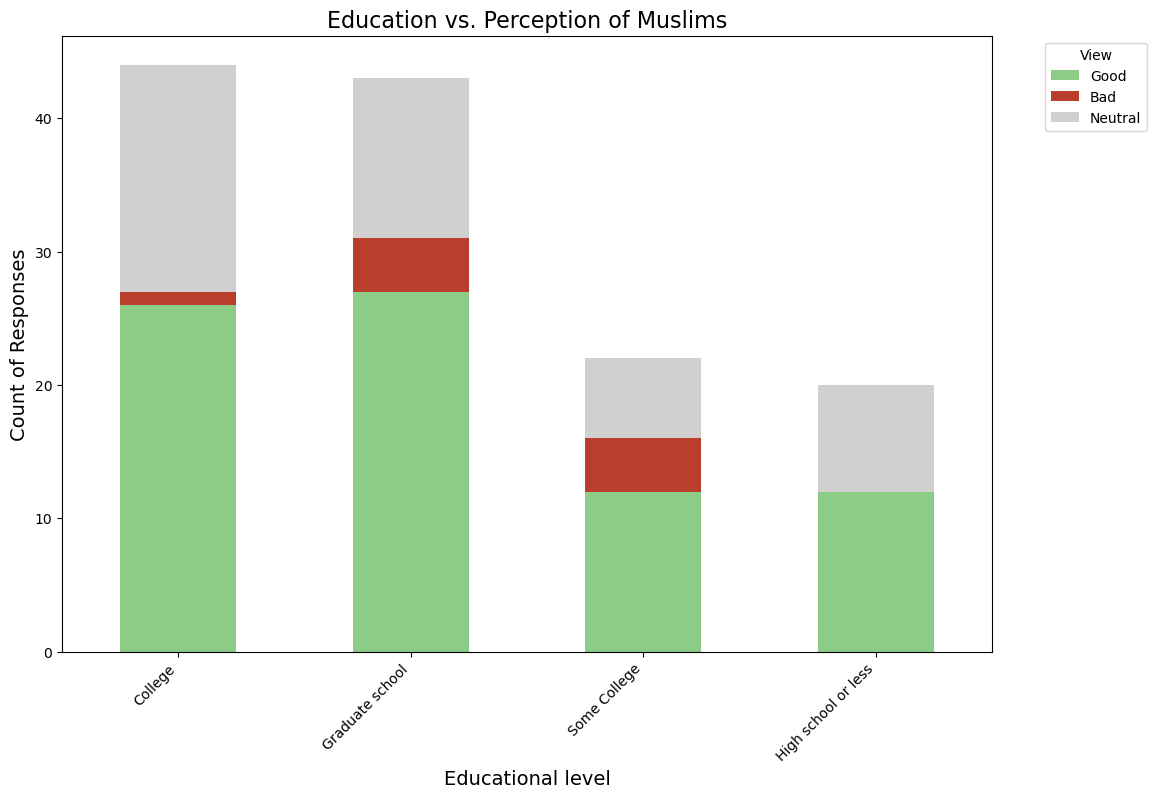

In [90]:
plot_stacked_bar_chart(
    df=survey_oct24, 
    title='Education vs. Perception of Muslims',
    xlabel='Educational level',
    ylabel='Count of Responses',
    colors=['#8ccc87', '#ba3e2b', '#d1cfcf'],
    cat_col='What is your level of education?',
    sent_col='How do you feel about Muslim people in America?'
)

# 5. Relationship between knowing a Muslim and Sentiment

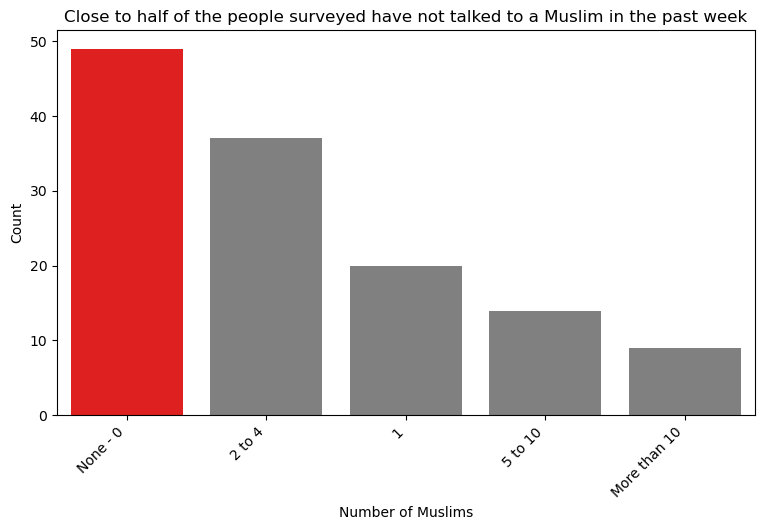

In [92]:
plot_counts(survey_oct24,'In the last 7 days, how many muslim people have you talked to?', 'Number of Muslims',\
           'Close to half of the people surveyed have not talked to a Muslim in the past week')

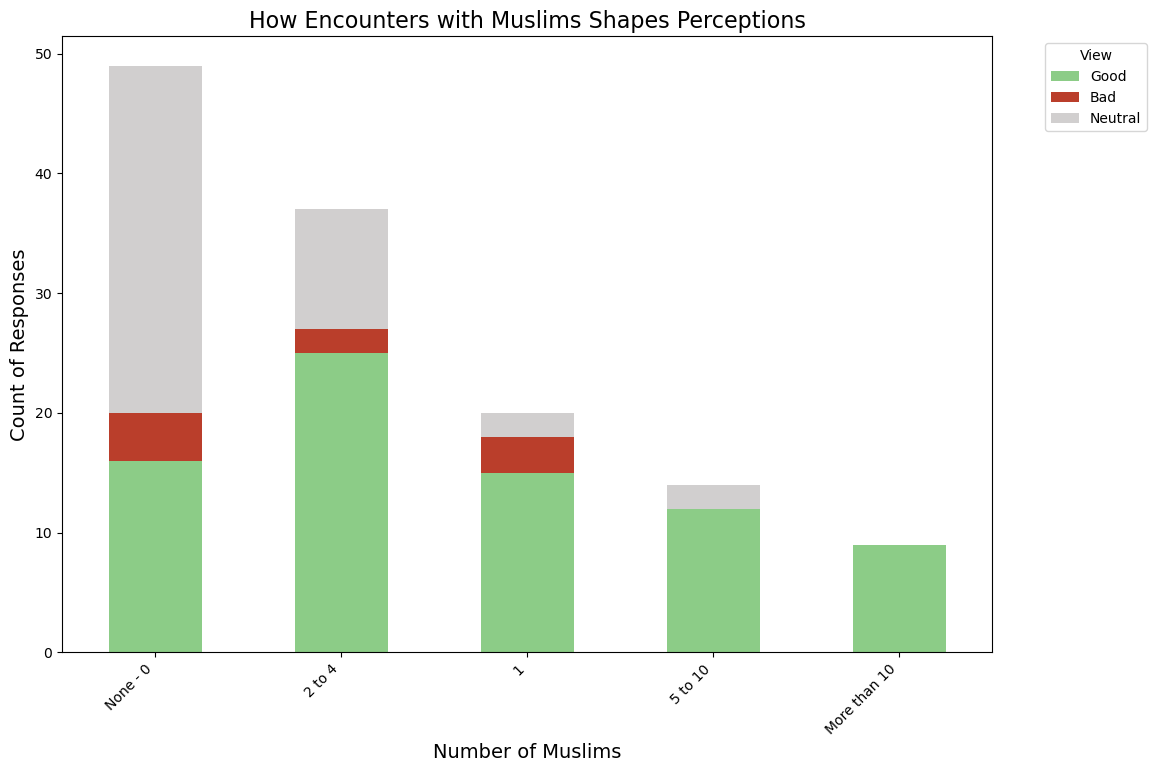

In [97]:
plot_stacked_bar_chart(
    df=survey_oct24, 
    title='How Encounters with Muslims Shape Perceptions',
    xlabel='Number of Muslims',
    ylabel='Count of Responses',
    colors=['#8ccc87', '#ba3e2b', '#d1cfcf'],
    cat_col='In the last 7 days, how many muslim people have you talked to?',
    sent_col='How do you feel about Muslim people in America?'
)

In [ ]:
survey_oct24['interaction_group'] = survey_oct24['In the last 7 days, how many muslim people have you talked to?'].\
apply(lambda x: 'Had interactions' if x != 'None - 0' else 'No interactions')

grouped = survey_oct24.groupby(['interaction_group', 'How do you feel about Muslim people in America?']).\
size().reset_index(name='count')

totals = grouped.groupby('interaction_group')['count'].transform('sum')
grouped['percentage'] = (grouped['count'] / totals) * 100

plt.figure(figsize=(8, 6))
palette = {
    'Good':'#8ccc87',
    'Bad':'#ba3e2b',
    'Neutral': '#d1cfcf'
}
sns.barplot(x='interaction_group', y='percentage', \
            hue='How do you feel about Muslim people in America?', data=grouped, palette= palette)
plt.title('Comparison of Perceptions by Interaction Group')
plt.xlabel('Interaction Group')
plt.ylabel('Percentage of Responses')
plt.legend(title='Perception', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 6. Relationship Between Primary News Sources and Public Sentiment

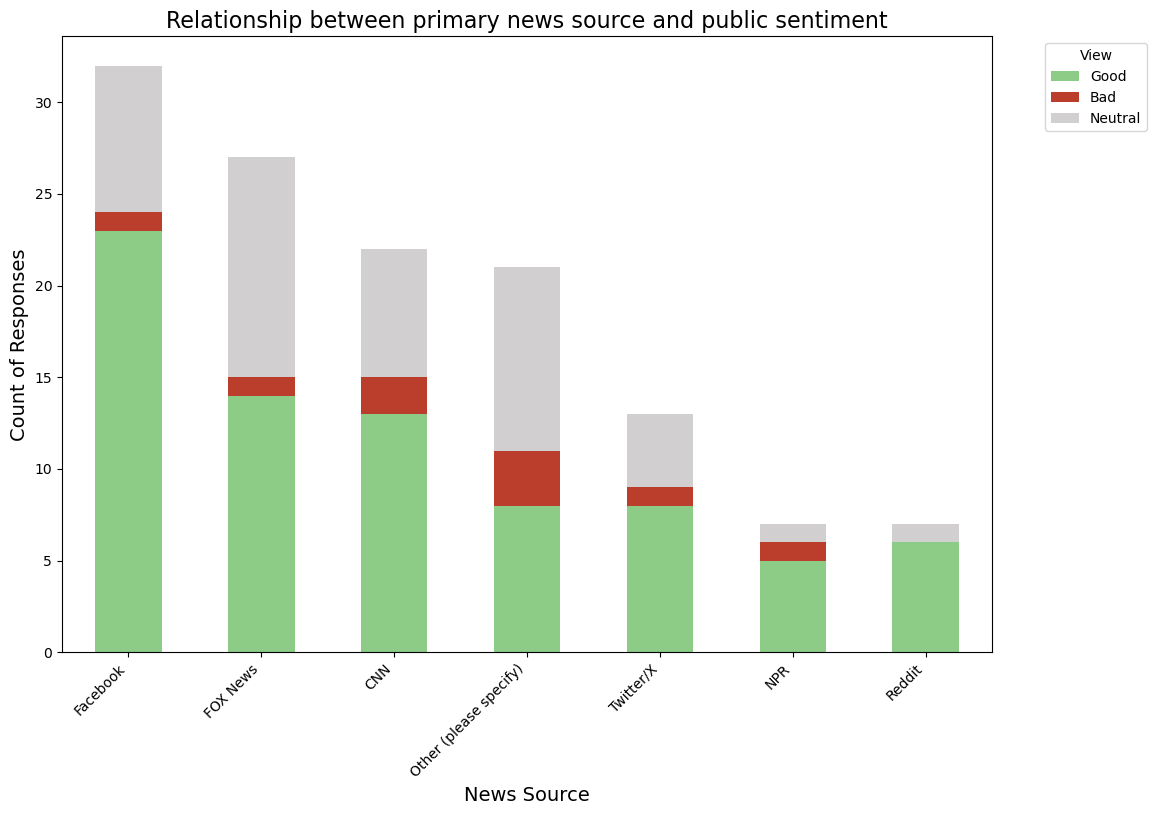

In [98]:
plot_stacked_bar_chart(
    df=survey_oct24, 
    title='Relationship between primary news source and public sentiment',
    xlabel='News Source',
    ylabel='Count of Responses',
    colors=['#8ccc87', '#ba3e2b', '#d1cfcf'],
    cat_col= 'Where do you get your news from?',
    sent_col='How do you feel about Muslim people in America?'
)

In [ ]:
grouped = survey_oct24.groupby(['Where do you get your news from?', 'How do you feel about Muslim people in America?'])\
.size().reset_index(name='count')
grouped['total_count'] = grouped.groupby('Where do you get your news from?')['count'].transform('sum')
grouped['percentage'] = (grouped['count'] / grouped['total_count']) * 100


plt.figure(figsize=(10, 6))
palette = {'Good': '#8ccc87', 'Bad':'#ba3e2b', 'Neutral':'#d1cfcf'}
sns.barplot(x='Where do you get your news from?', y='percentage',\
            hue='How do you feel about Muslim people in America?', data=grouped, palette=palette)

# Add labels and title
plt.title('Normalized Comparison of Sentiments by News Source')
plt.xlabel('News Source')
plt.ylabel('Percentage of Responses')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [105]:
survey_oct24['News_other'].value_counts()

ABC                                           2
local tv and talk radio                       1
Google pages                                  1
our work feed and google                      1
Research                                      1
Local  c w                                    1
Google                                        1
I do my own research about current events.    1
The                                           1
cnn and local channel                         1
Social media                                  1
ABC, nbc, apnews                              1
tv                                            1
Google/Various Newspaper Sites                1
KTLA 5                                        1
other                                         1
Local news                                    1
a variety of sources                          1
Husband                                       1
Name: News_other, dtype: int64

# 7. Relationship between gender and sentiment

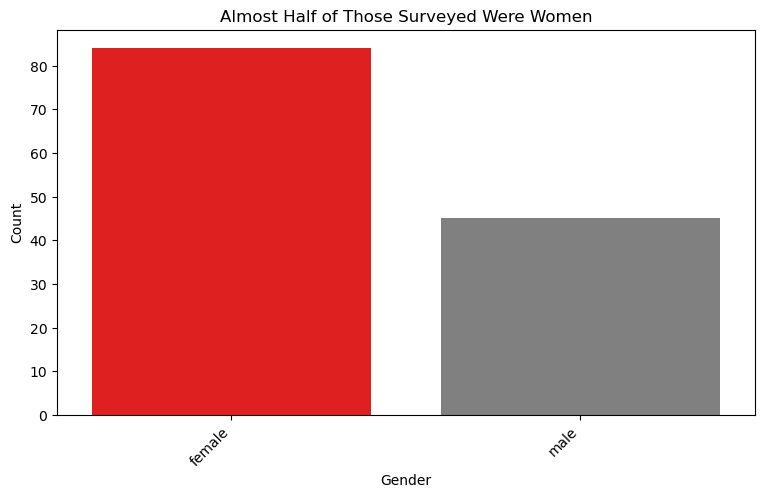

In [112]:
plot_counts(survey_oct24,'Gender', 'Gender',
           '65% of Respondents Were Women')